# Tutorial 1: Plot Data by Groups Flexibly

In neurophysiological analysis.  To plot PSTH (peri-stimulus-time-histogram) for spiking data or to plot ERP (event-evoked potantial) for local field potential (LFP) usually serves as the first step to understand the neural response.

This tutorial demonstrates how the package can flexibly group data and plot them

Some example usage of several functions will be explained, but if you want to have more control on the analysis/plotting, please refers to the documentation of the functions, simply do `help(the_function_of_interest)` as almost all functions in the package are weel documented


# Section 0: load data as `data_neuro` structure

The basic data structure `data_neuro` and the example data have beeen introduced in totorial **Basic_Data_Structure_`data_neuro`.ipynb**

We here load both spiking data and LFP data as the format

In [1]:
# standard Python pakages
import os
import sys
import numpy as np
import scipy as sp
import pandas as pd         # pandas tabular DataFrame for task/behavioral data
import matplotlib as mpl    # plot
import matplotlib.pyplot as plt
import re                   # regular expression
import time                 # time code execution
import pickle

# sub-modules in the package of PyNeuroSG 
import PyNeuroData as pnd   # in this package: align neural data according to task
import df_ana               # in this package: functions related to analys DataFrame (table-like) data
import PyNeuroAna as pna    # in this package: analysis
import PyNeuroPlot as pnp   # in this package: plot
import misc_tools           # in this package: misc

import data_load_DLSH       # package specific for data stored in Sheinberg lab

# make matplotlib plots show in Jupyter Notebook
%matplotlib inline

/shared/homes/sguan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
""" specify location of example data """

rel_path_demo_data_folder = '../demo_data'
dirname_demo_data = 'example_data_Thor_180530'

cur_path = os.getcwd()

path_demo_data_folder = os.path.normpath(os.path.join(cur_path, rel_path_demo_data_folder))
path_dir_demo_data = os.path.join(path_demo_data_folder, dirname_demo_data)



""" load data """
keyword_tank = 'Thor_U16.*'     # regular expression, or use the full name 'Thor_U16_180530'
keyword_block = 'h_srv_.*'      # regular expression of the recording session names
tf_interactive = False          # if True, select recording sessions manually, otherwise, use all that matches

""" load neural data and behaviral data that matches the keywords """
[blk, data_df, name_tdt_blocks] = data_load_DLSH.load_data(keyword = keyword_block, keyword_tank=keyword_tank,
                                                           tf_interactive=tf_interactive,
                                                           dir_tdt_tank=path_dir_demo_data,
                                                           dir_dg=os.path.join(path_dir_demo_data, 'behavioral_data'),
                                                          mode='both')

filename_common = misc_tools.str_common(name_tdt_blocks)
dir_temp_fig = './temp_figs'

""" make sure data field exists and standardize it """
data_df = data_load_DLSH.standardize_data_df(data_df, filename_common)
blk = data_load_DLSH.standardize_blk(blk)


the following tdt blockes are selected: ['h_srv_mask_053018002', 'h_srv_mask_053018003']
the following dg files are selected: ['h_srv_mask_053018002', 'h_srv_mask_053018003']
the their intersections are: ['h_srv_mask_053018002', 'h_srv_mask_053018003']

the data files to be loaded are: ['h_srv_mask_053018002', 'h_srv_mask_053018003']
loading TDT block: h_srv_mask_053018002
loading TDT block: h_srv_mask_053018003
finish loading tdt blocks
loading dg: h_srv_mask_053018002.dg
loading dg: h_srv_mask_053018003.dg
finish loading and concatenating dgs


Align both spikes and LFPs to the event of visual stimulus onset `stimon`, and generate aligned data `data_neuro_spk`, `data_neuro_lfp`

In [3]:
""" align neural data to the event 'stimon' from behaviral data """

""" spiking data """

# get the timestamps of the stimon event relative to the sync signal, and translate it to the absolute time in the neural data file
ts_StimOn = data_load_DLSH.get_ts_align(blk, data_df, dg_tos_align='stimon')

# align the neural data according to the timestamps, here only use the spiketrains data
data_neuro_spk = pnd.blk_align_to_evt(blk, ts_StimOn, [-0.100, 0.600], type_filter='spiketrains.*',
                                           name_filter='.*Code[1-9]$', spike_bin_rate=1000)
pnd.include_trial_info(data_neuro_spk, data_df)


""" LFP data """
# get the timestamps of the stimon event relative to the sync signal, and translate it to the absolute time in the neural data file
ts_StimOn = data_load_DLSH.get_ts_align(blk, data_df, dg_tos_align='stimon')

# align the neural data according to the timestamps, here only use the spiketrains data
data_neuro_lfp = pnd.blk_align_to_evt(blk, ts_StimOn, [-0.100, 0.600], type_filter='analogsignals.*',
                                           name_filter='LFPs.*', spike_bin_rate=1000)
pnd.include_trial_info(data_neuro_lfp, data_df)

print('data_neuro_spk')
print(data_neuro_spk['data'].shape)
print(data_neuro_spk['signal_info'].dtype)
print(data_neuro_spk['signal_info'])
print('')
print('data_neuro_lfp')
print(data_neuro_lfp['data'].shape)
print(data_neuro_lfp['signal_info'].dtype)
print(data_neuro_lfp['signal_info'])

data_neuro_spk
(1200, 700, 12)
[('name', '<U32'), ('type', '<U32'), ('sampling_rate', '<f8'), ('channel_index', '<i8'), ('sort_code', '<i8')]
[('Chan5 Code1', 'spiketrains', 1000.,  5, 1)
 ('Chan6 Code2', 'spiketrains', 1000.,  6, 2)
 ('Chan7 Code2', 'spiketrains', 1000.,  7, 2)
 ('Chan8 Code2', 'spiketrains', 1000.,  8, 2)
 ('Chan9 Code1', 'spiketrains', 1000.,  9, 1)
 ('Chan10 Code2', 'spiketrains', 1000., 10, 2)
 ('Chan11 Code1', 'spiketrains', 1000., 11, 1)
 ('Chan12 Code1', 'spiketrains', 1000., 12, 1)
 ('Chan13 Code2', 'spiketrains', 1000., 13, 2)
 ('Chan14 Code1', 'spiketrains', 1000., 14, 1)
 ('Chan15 Code1', 'spiketrains', 1000., 15, 1)
 ('Chan16 Code2', 'spiketrains', 1000., 16, 2)]

data_neuro_lfp
(1200, 712, 16)
[('name', '<U32'), ('type', '<U32'), ('sampling_rate', '<f8'), ('channel_index', '<i8'), ('sort_code', '<i8')]
[('LFPs 1', 'analogsignals', 1017.25262451,  1, 0)
 ('LFPs 2', 'analogsignals', 1017.25262451,  2, 0)
 ('LFPs 3', 'analogsignals', 1017.25262451,  3, 0)
 (

# Section 1: Overview Plot Data of All Channels

**`pnp.DataNeuroSummaryPlot()`**

Before looking into every channel and studay how experimental conditions modulate the response, we can first have a overview of the response by averaging trials over all conditions

To do this we can use a convinient function `pnp.DataNeuroSummeryPlot()`

In [4]:
help(pnp.DataNeuroSummaryPlot)

Help on function DataNeuroSummaryPlot in module PyNeuroPlot:

DataNeuroSummaryPlot(data_neuro, sk_std=None, signal_type='auto', suptitle='', xlabel='', ylabel='', tf_legend=False)
    Summary plot for data_neuro, uses SmartSubplot and PsthPlot
    
    Use data_neuro['cdtn'] to sort and group trials in to sub-panels, plot all signals in every sub-panel
    
    :param data_neuro:  data_neuro structure, see moduel pnd.blk_align_to_evt
    :param sk_std:      smoothness kernel, if None, set automatically based on data type
    :param signal_type: 'spk', 'LFP' or 'auto'
    :param suptitle:    title of figure
    :param xlabel:      xlabel
    :param ylabel:      ylabel
    :return:            figure handle



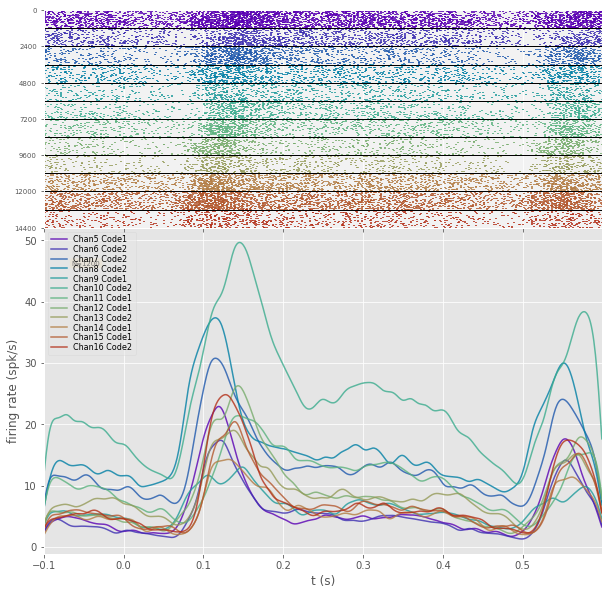

In [5]:
plt.figure(figsize=(10,10))
pnp.DataNeuroSummaryPlot(data_neuro_spk, tf_legend=True)

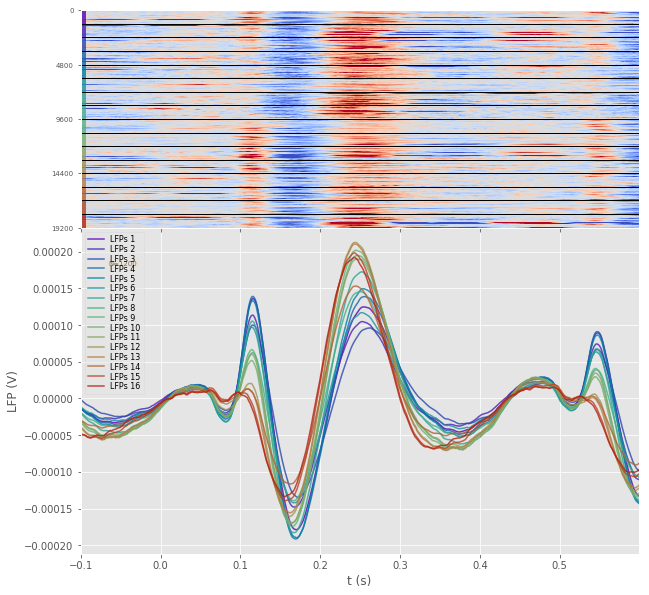

In [6]:
plt.figure(figsize=(10,10))
pnp.DataNeuroSummaryPlot(data_neuro_lfp, tf_legend=True)

# Section 2: Individual Channel, One Trial in a Row

**`pnp.RasterPlot()`**


Now we want to focus on a single channel and to understand how diferent experimental conditions modulates this channel's response.

Here we can use `pnp.RasterPlot()`, which plot every trial in a row

Raster plot originally refers to the plot for spiking data, where every row represents one trial and every raster indicates the time when an spike occurs in a trial.

Here we also use the same function to plot LFP data, where every row still represnts one trial and the color indicates the potential over time.  (red for positive and blue for negative)



In [7]:
help(pnp.RasterPlot)

Help on function RasterPlot in module PyNeuroPlot:

RasterPlot(data2D, ts=None, cdtn=None, colors=None, RasterType='auto', max_rows=None)
    Spike/LFP raster Plot, where evary row presresent one trial, sorted by cdtn
    
    :param data2D:   2D np.array of boolean/float values, [N_trial * N_ts]
    :param ts:       1D np.array of timestamps, 1D np.array of length N_ts,    used as x axis for plot
    :param cdtn:     condition of every trial,  1D np.array of length N_trial, used to sort trials
    :param colors:   a list of colors for every unique condition
    :param RasterType:    string, 'spk', 'LFP' or 'auto', default to 'auto':
    
                     * if 'spk'  : data2D is boolean, where every True value represents a spike, plot line raster
                     * if 'LFP'  : data2D is continuous float, plot pcolormesh
                     * if 'auto' : use data2D format to decide which plot to use
    :return:         handle of raster plot



## 2.1 RasterPlot for all trials

Text(0.5,1,'Chan10 Code2')

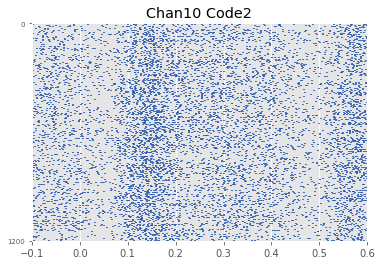

In [8]:
i_signal = 5

data2D = data_neuro_spk['data'][:, :, i_signal]

pnp.RasterPlot(data2D, ts=data_neuro_spk['ts'])
plt.title(data_neuro_spk['signal_info']['name'][i_signal])

Text(0.5,1,'LFPs 10')

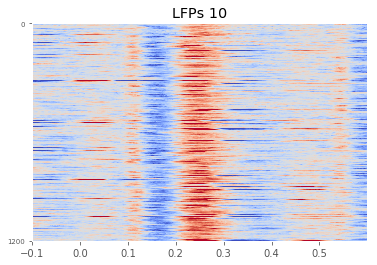

In [9]:
i_signal = 9

data2D = data_neuro_lfp['data'][:, :, i_signal]

pnp.RasterPlot(data2D, ts=data_neuro_lfp['ts'])
plt.title(data_neuro_lfp['signal_info']['name'][i_signal])

## 2.2 RaserPlot grouped by condition

We can group trials by the a columns in the Pandas DataFrame that stores information for all trials

In [10]:
# show several features of trials that can be used for grouping
data_df[['mask_opacity_int', 'stim_familiarized', 'stim_sname', 'stim_categories']].head(20)

,mask_opacity_int,stim_familiarized,stim_sname,stim_categories
0,90,0,face_nov_11575,face
1,0,0,dog_nov_85,dog
2,70,0,face_nov_3520,face
3,90,1,bird_fam_4201,bird
4,0,1,face_fam_5192,face
5,90,1,house_fam_17794,house
6,90,1,face_fam_5192,face
7,70,1,house_fam_8911,house
8,70,1,house_fam_17794,house
9,0,0,dog_nov_85,dog


Text(0.5,1,'Chan10 Code2 grouped by stim_sname')

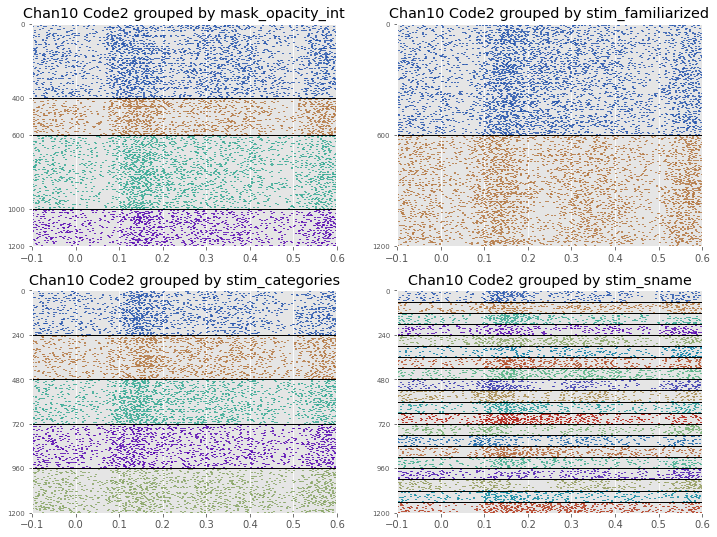

In [11]:
i_signal = 5

data2D = data_neuro_spk['data'][:, :, i_signal]
signal_name = data_neuro_spk['signal_info']['name'][i_signal]

plt.figure(figsize=(12,9))

plt.subplot(2,2,1)
groupby_name = 'mask_opacity_int'
pnp.RasterPlot(data2D, ts=data_neuro_spk['ts'], cdtn=data_neuro_spk['trial_info'][groupby_name])
plt.title('{} grouped by {}'.format(signal_name, groupby_name))

plt.subplot(2,2,2)
groupby_name = 'stim_familiarized'
pnp.RasterPlot(data2D, ts=data_neuro_spk['ts'], cdtn=data_neuro_spk['trial_info'][groupby_name])
plt.title('{} grouped by {}'.format(signal_name, groupby_name))

plt.subplot(2,2,3)
groupby_name = 'stim_categories'
pnp.RasterPlot(data2D, ts=data_neuro_spk['ts'], cdtn=data_neuro_spk['trial_info'][groupby_name])
plt.title('{} grouped by {}'.format(signal_name, groupby_name))

plt.subplot(2,2,4)
groupby_name = 'stim_sname'
pnp.RasterPlot(data2D, ts=data_neuro_spk['ts'], cdtn=data_neuro_spk['trial_info'][groupby_name])
plt.title('{} grouped by {}'.format(signal_name, groupby_name))

Text(0.5,1,'LFPs 10 grouped by stim_sname')

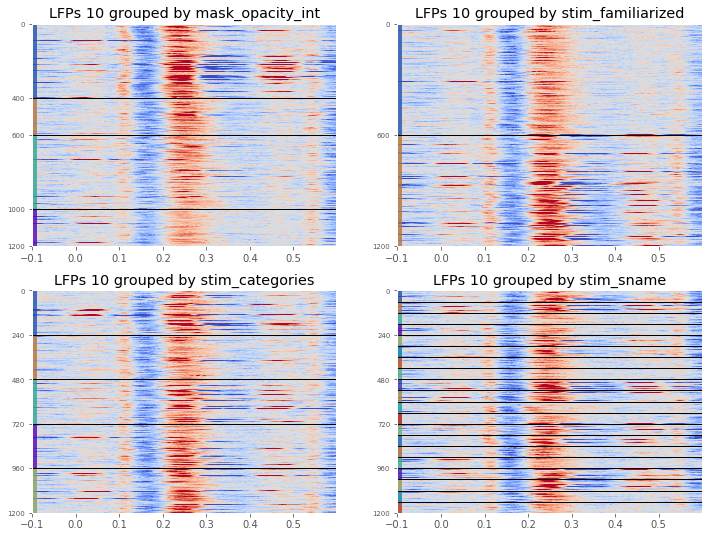

In [12]:
i_signal = 9

data2D = data_neuro_lfp['data'][:, :, i_signal]
signal_name = data_neuro_lfp['signal_info']['name'][i_signal]

plt.figure(figsize=(12,9))

plt.subplot(2,2,1)
groupby_name = 'mask_opacity_int'
pnp.RasterPlot(data2D, ts=data_neuro_lfp['ts'], cdtn=data_neuro_lfp['trial_info'][groupby_name])
plt.title('{} grouped by {}'.format(signal_name, groupby_name))

plt.subplot(2,2,2)
groupby_name = 'stim_familiarized'
pnp.RasterPlot(data2D, ts=data_neuro_lfp['ts'], cdtn=data_neuro_lfp['trial_info'][groupby_name])
plt.title('{} grouped by {}'.format(signal_name, groupby_name))

plt.subplot(2,2,3)
groupby_name = 'stim_categories'
pnp.RasterPlot(data2D, ts=data_neuro_lfp['ts'], cdtn=data_neuro_lfp['trial_info'][groupby_name])
plt.title('{} grouped by {}'.format(signal_name, groupby_name))

plt.subplot(2,2,4)
groupby_name = 'stim_sname'
pnp.RasterPlot(data2D, ts=data_neuro_lfp['ts'], cdtn=data_neuro_lfp['trial_info'][groupby_name])
plt.title('{} grouped by {}'.format(signal_name, groupby_name))

# Section 3 PSTH of a individual channel in a single subplot

PSTH (peri-stimulus time histrogram) plot is the standard method to plot spikes along time averaged cross trials.   


In [13]:
help(pnp.PsthPlot)

Help on function PsthPlot in module PyNeuroPlot:

PsthPlot(data, ts=None, cdtn=None, limit=None, sk_std=None, subpanel='auto', color_style='discrete', tf_legend=False, xlabel=None, ylabel=None, legend_title=None)
    funciton to plot psth with a raster panel on top of PSTH, works for both spike data and LFP data
    
    :param data:        neuro data, np array of various size and dtpye:
                            size: 2D [N_trials * N_ts] or 3D [N_trials * N_ts * N_signals]
                            dtype: boolean (spike exist or not) or float (LFP continuous values)
    :param ts:          1D array containing timestamps for data (length is N_ts)
    :param cdtn:        conditions used to group
                            if data is 2D, represent the type of trials,  len(cdtn)=N_ts
                            if data is 3D, represent the type of signals, len(cdtn)=N_signals
    :param limit:       index array to select a subset of the trials of data, i.e., data=data[limit,:]
    :

## Plot PSTH over all trials,  grouped by conditions and/or with sub-selection

Text(0.5,1,'smoothed,  with raster,  grouped, select subset')

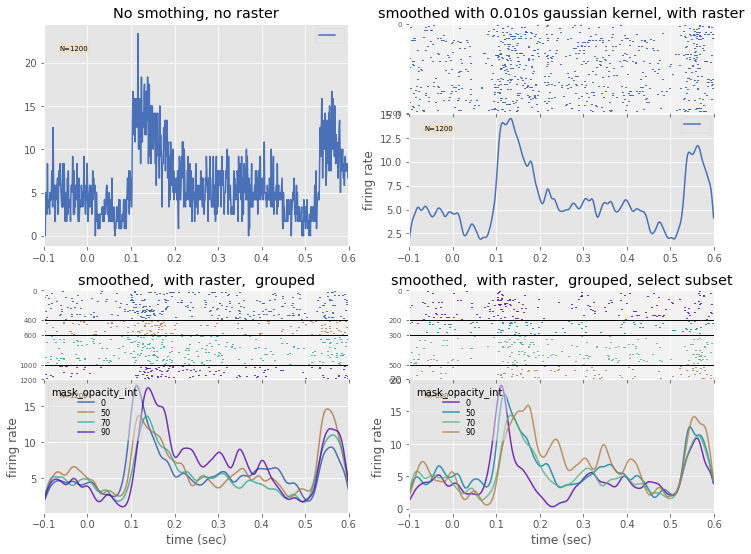

In [14]:
index_signal = 5
data2D = data_neuro_spk['data'][:, :, i_signal]
groupby_name = 'mask_opacity_int'

plt.figure(figsize=(12,9))

plt.subplot(2,2,1)
pnp.PsthPlot(data2D, ts=data_neuro_spk['ts'], tf_legend=True, subpanel='')
plt.title('No smothing, no raster')


plt.subplot(2,2,2)
pnp.PsthPlot(data2D, ts=data_neuro_spk['ts'], 
             subpanel='auto',                                              # use subpanel to plot raster
             sk_std = 0.005,                                               # std of smooth kernel, in sec
             ylabel='firing rate', tf_legend=True)
plt.title('smoothed with 0.010s gaussian kernel, with raster')


plt.subplot(2,2,3)
pnp.PsthPlot(data2D, ts=data_neuro_spk['ts'], 
             subpanel='auto', sk_std = 0.010, 
             cdtn=data_neuro_spk['trial_info'][groupby_name],              # group by conditions
             xlabel='time (sec)', ylabel='firing rate', 
             tf_legend=True, legend_title=groupby_name)
plt.title('smoothed,  with raster,  grouped')


plt.subplot(2,2,4)
pnp.PsthPlot(data2D, ts=data_neuro_spk['ts'], 
             subpanel='auto', sk_std = 0.010, 
             cdtn=data_neuro_spk['trial_info'][groupby_name],              # group by conditions
             limit=data_neuro_spk['trial_info']['stim_familiarized']==1,   # select subset of trials
             xlabel='time (sec)', ylabel='firing rate', 
             color_style = 'continuous',                                   # another color style
             tf_legend=True, legend_title=groupby_name)
plt.title('smoothed,  with raster,  grouped, select subset')


Text(0.5,1,'with raster,  grouped, select subset')

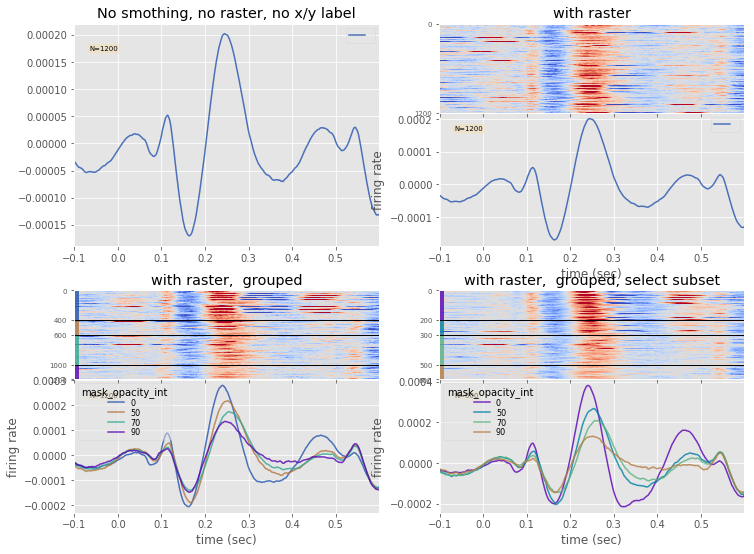

In [15]:
index_signal = 9
data2D = data_neuro_lfp['data'][:, :, i_signal]
groupby_name = 'mask_opacity_int'

plt.figure(figsize=(12,9))

plt.subplot(2,2,1)
pnp.PsthPlot(data2D, ts=data_neuro_lfp['ts'], tf_legend=True, subpanel='')
plt.title('No smothing, no raster, no x/y label')


plt.subplot(2,2,2)
pnp.PsthPlot(data2D, ts=data_neuro_lfp['ts'], 
             subpanel='auto',                                              # use subpanel to plot raster
             xlabel='time (sec)', ylabel='firing rate', tf_legend=True)
plt.title('with raster')


plt.subplot(2,2,3)
pnp.PsthPlot(data2D, ts=data_neuro_lfp['ts'], 
             subpanel='auto', 
             cdtn=data_neuro_lfp['trial_info'][groupby_name],              # group by conditions
             xlabel='time (sec)', ylabel='firing rate', 
             tf_legend=True, legend_title=groupby_name)
plt.title('with raster,  grouped')


plt.subplot(2,2,4)
pnp.PsthPlot(data2D, ts=data_neuro_lfp['ts'], 
             subpanel='auto', 
             cdtn=data_neuro_lfp['trial_info'][groupby_name],              # group by conditions
             limit=data_neuro_lfp['trial_info']['stim_familiarized']==1,   # select subset of trials
             xlabel='time (sec)', ylabel='firing rate', 
             color_style = 'continuous',                                   # another color style
             tf_legend=True, legend_title=groupby_name)
plt.title('with raster,  grouped, select subset')


# Section 4: PSTH of an individual channel grouped in multiple subplots

Sometimes one single subplot with multiple traces of different colors is not enough.  We want to use multiple subplots to better see them.

We can use `pna.DfGroupby` to group trials, use `pnp.CreateSubplotFromGroupby` to create subplots and use `pnp.PsthPlot` to plot in every panel.

Or alternatively, we can use `pnp.PsthPlotMultiPanel` to do it in one funcion call

## 4.1 Use three functions

In [16]:
help(df_ana.DfGroupby)

print('')

help(pnp.CreateSubplotFromGroupby)

Help on function DfGroupby in module df_ana:

DfGroupby(data_df, groupby='', limit=None, tf_aggregate=False, tf_linearize=False)
    group a pandas DataFrame by 'groupby', and returns the grouped indexes and order in group
    
    :param data_df:      pandas DataFrame
    :param groupby:      column name(s) to group the data_df, either a str or a list of strings
    :param limit:        a filter on the indexes, either a boolean array or an index array
    :param tf_aggregate: True/False to add a aggregation group (not grouped) for every column
    :param tf_linearize: True/False to linearize the order of groups, ie., turn (3,0) to 4
    :return: {'idx': {group_key: array of trial indexes within group}, 'order': {group_key: order in plot}}


Help on function CreateSubplotFromGroupby in module PyNeuroPlot:

CreateSubplotFromGroupby(df_groupby_ord, figsize=None, tf_title=True)
    creates subplots according to the structure defined in df_ana.dfGropuby
    
    :param df_groupby_ord: dict

Text(0.5,0.98,"subplots grouped by ['stim_familiarized', 'mask_opacity_int']")

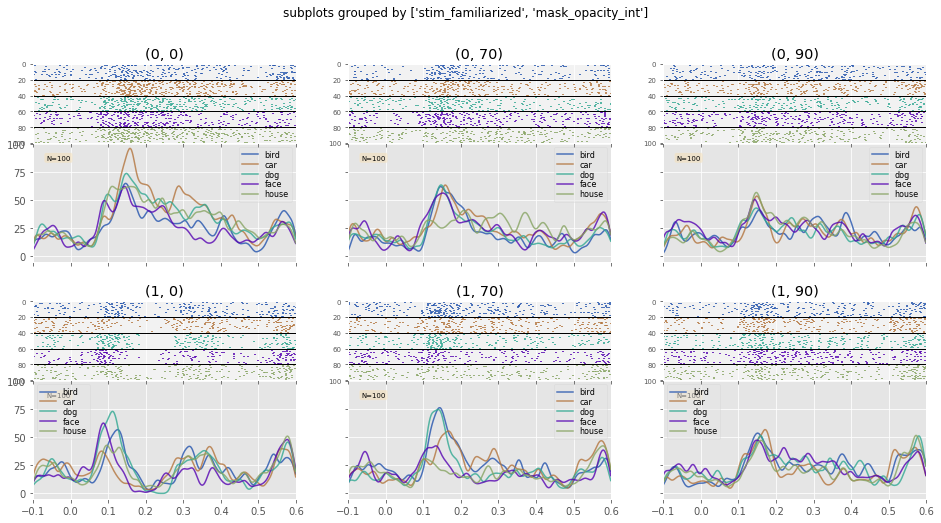

In [17]:
# use the three functions

index_signal = 5

sbuplot_groupby = ['stim_familiarized', 'mask_opacity_int']
df_grpby = df_ana.DfGroupby(data_df, groupby=sbuplot_groupby, tf_aggregate=False, limit=data_df['file']==2)
h_fig, h_axes = pnp.CreateSubplotFromGroupby(df_grpby['order'], figsize=(16,8))
for cdtn in df_grpby['idx']:
    plt.axes(h_axes[cdtn])
    idx_trials = df_grpby['idx'][cdtn]
    pnp.PsthPlot(data_neuro_spk['data'][idx_trials, :, index_signal], ts=data_neuro_spk['ts'], 
                 cdtn=data_df['stim_categories'][idx_trials], sk_std=0.01, tf_legend=True)
    plt.title(cdtn)
plt.suptitle('subplots grouped by {}'.format(sbuplot_groupby))


## 4.2 Use one fuction call

In [18]:
help(pnp.PsthPlotMultiPanel)

Help on function PsthPlotMultiPanel in module PyNeuroPlot:

PsthPlotMultiPanel(data_neuro=None, index_signal=0, data2D=None, ts=None, data_df=None, limit=None, groupby_subplots='', aggregate_subplots=False, linearize_subplots=False, groupby_panel='', sk_std=None, subpanel='auto', color_style='discrete', tf_legend=True, xlabel=None, ylabel=None, figsize=(12, 9), signal_name='')
    plot PSTH in multiple subplots grouped by experimental conditions, a wrapper function of
    pnp.PsthPlot, pnp.CreateSubplotFromGroupby and df_ana.DfGroupby,
    data either provided by (data_neuro, index_signal) or (data2D, ts, data_df), the later one offers more control
    
    :param data_neuro:   standard data_neuro structure, retured by pnd.blk.align_to_event()
    :param index_signal: index of signal used to select data_neuro['data'][:, :, index_signal]
    :param data2D:       neural data of one signal/channel,  shape=[N_trials * N_ts]
    :param ts:           1D array containing timestamps for data (

(<matplotlib.figure.Figure at 0x7f6d82f58d68>,
 {(0, 0): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d828ba3c8>,
  (0, 70): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d82874588>,
  (0, 90): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d8282a3c8>,
  (1, 0): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d827e43c8>,
  (1, 70): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d8279d240>,
  (1, 90): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d82747b38>})

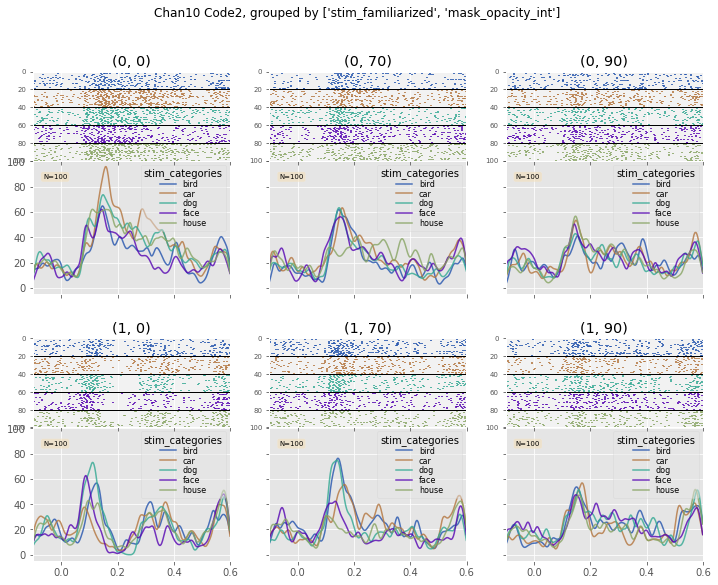

In [19]:
# plot using one function call

pnp.PsthPlotMultiPanel(data_neuro_spk, index_signal=5, 
                      limit=data_neuro_spk['trial_info']['file']==2,
                      groupby_subplots=['stim_familiarized', 'mask_opacity_int'],
                      groupby_panel='stim_categories', tf_legend=True,
                      sk_std=0.010)

## 4.3 more examples

(<matplotlib.figure.Figure at 0x7f6d81efc320>,
 {'': <matplotlib.axes._subplots.AxesSubplot at 0x7f6d8275f978>})

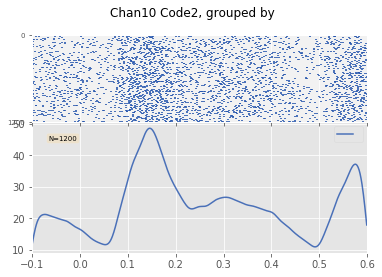

In [20]:
# do not group trials

pnp.PsthPlotMultiPanel(data_neuro_spk, index_signal=5, sk_std=0.010, figsize=(6,4))

(<matplotlib.figure.Figure at 0x7f6d828f9d68>,
 {'': <matplotlib.axes._subplots.AxesSubplot at 0x7f6d820785c0>})

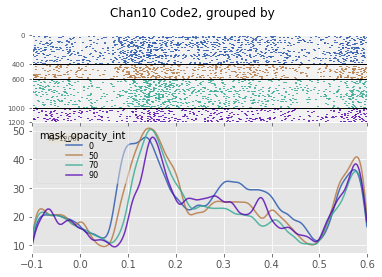

In [21]:
# group in to colored traces in the same subplot

pnp.PsthPlotMultiPanel(data_neuro_spk, index_signal=5, figsize=(6,4),
                      groupby_panel='mask_opacity_int', tf_legend=True,
                      sk_std=0.010)

(<matplotlib.figure.Figure at 0x7f6d81ea2e10>,
 {0: <matplotlib.axes._subplots.AxesSubplot at 0x7f6d80dda470>,
  50: <matplotlib.axes._subplots.AxesSubplot at 0x7f6d80373b00>,
  70: <matplotlib.axes._subplots.AxesSubplot at 0x7f6d81aae7f0>,
  90: <matplotlib.axes._subplots.AxesSubplot at 0x7f6d81de87f0>})

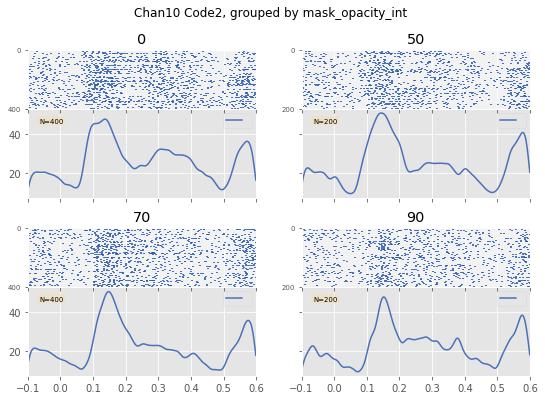

In [22]:
# group in subplots by one feature: automatic row and colum

pnp.PsthPlotMultiPanel(data_neuro_spk, index_signal=5, figsize=(9,6),
                      groupby_subplots='mask_opacity_int', tf_legend=True,
                      sk_std=0.010)

(<matplotlib.figure.Figure at 0x7f6d80e5a080>,
 {(0, ''): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d7bbbd4e0>,
  (50, ''): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d81cf2b38>,
  (70, ''): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d7bb68908>,
  (90, ''): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d7bb24860>})

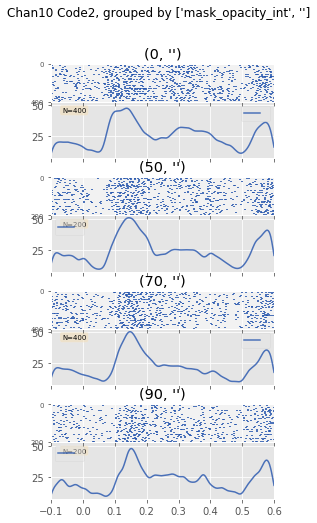

In [23]:
# group in subplots by one feature: in rows

pnp.PsthPlotMultiPanel(data_neuro_spk, index_signal=5, figsize=(4,8),
                      groupby_subplots=['mask_opacity_int', ''], tf_legend=True,
                      sk_std=0.010)

(<matplotlib.figure.Figure at 0x7f6d81df6710>,
 {('', 0): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d7bb9c668>,
  ('', 50): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d7ae9d7b8>,
  ('', 70): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d7ae56588>,
  ('', 90): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d7ae0e550>})

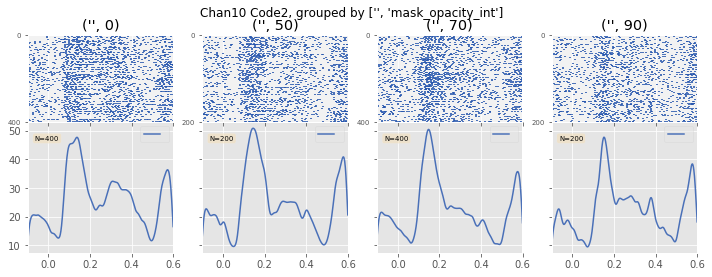

In [24]:
# group in subplots by one feature: in columns

pnp.PsthPlotMultiPanel(data_neuro_spk, index_signal=5, figsize=(12,4),
                      groupby_subplots=['', 'mask_opacity_int'], tf_legend=True,
                      sk_std=0.010)

(<matplotlib.figure.Figure at 0x7f6d81ca16a0>,
 {(0, 0): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d7ac905f8>,
  (0, 50): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d7ad713c8>,
  (0, 70): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d7a1a7208>,
  (0, 90): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d7a162208>,
  (1, 0): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d7a11b080>,
  (1, 50): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d7a0c5978>,
  (1, 70): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d7a0fd9e8>,
  (1, 90): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d7a0b87b8>})

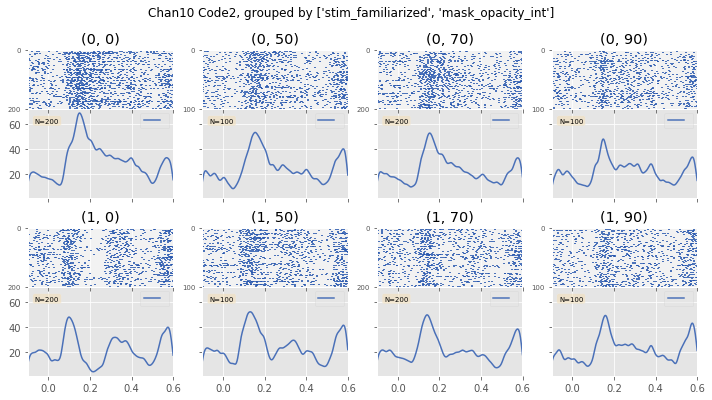

In [25]:
# group in subplots by two features

pnp.PsthPlotMultiPanel(data_neuro_spk, index_signal=5, figsize=(12,6),
                      groupby_subplots=['stim_familiarized', 'mask_opacity_int'], tf_legend=True,
                      sk_std=0.010)

(<matplotlib.figure.Figure at 0x7f6d7adba0b8>,
 {('all', 'all'): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d7928d208>,
  ('all', 0): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d792a7dd8>,
  ('all', 50): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d79253d68>,
  ('all', 70): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d7920ed30>,
  ('all', 90): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d791c8ba8>,
  (0, 'all'): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d791fc390>,
  (0, 0): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d791b4400>,
  (0, 50): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d7916e1d0>,
  (0, 70): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d791264e0>,
  (0, 90): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d79126da0>,
  (1, 'all'): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d79089550>,
  (1, 0): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d790a0668>,
  (1, 50): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d7907d1d0>,
  (1, 70): <matpl

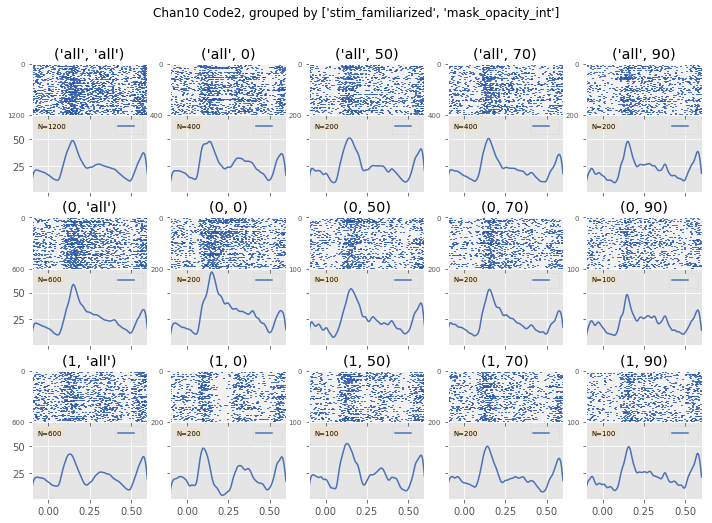

In [26]:
# group in subplots by two feature, with a aggreation row and column (averaged over every column and row)

pnp.PsthPlotMultiPanel(data_neuro_spk, index_signal=5, figsize=(12,8),
                      groupby_subplots=['stim_familiarized', 'mask_opacity_int'], 
                      aggregate_subplots=True, 
                      sk_std=0.010)

(<matplotlib.figure.Figure at 0x7f6d7a095668>,
 {('all', 'all'): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d72c91f28>,
  ('all', 0): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d72ca9908>,
  ('all', 50): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d72c497b8>,
  ('all', 70): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d72c00748>,
  ('all', 90): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d72bb85c0>,
  (0, 'all'): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d72be0c88>,
  (0, 0): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d72b99d68>,
  (0, 50): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d72b52b38>,
  (0, 70): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d72b08e48>,
  (0, 90): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d72b30198>,
  (1, 'all'): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d72aebe48>,
  (1, 0): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d72a84eb8>,
  (1, 50): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d72a60a58>,
  (1, 70): <matpl

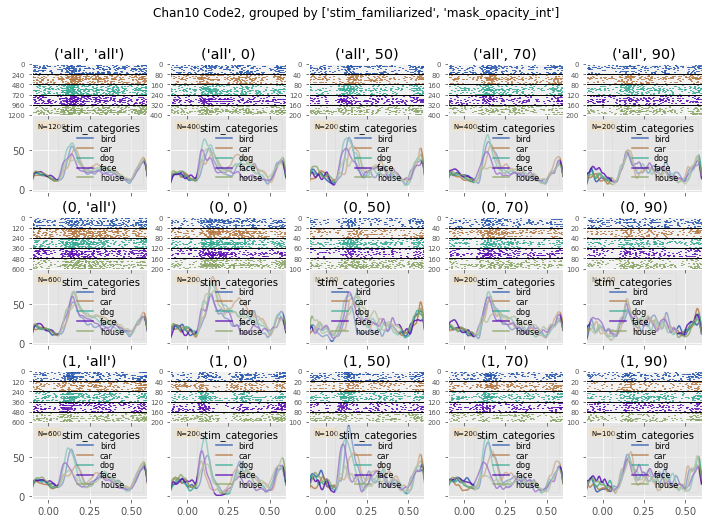

In [27]:
# group in subplots with aggreate row/col and group in panel

pnp.PsthPlotMultiPanel(data_neuro_spk, index_signal=5, figsize=(12,8),
                      groupby_subplots=['stim_familiarized', 'mask_opacity_int'], 
                      aggregate_subplots=True, 
                      groupby_panel='stim_categories',
                      sk_std=0.010)

(<matplotlib.figure.Figure at 0x7f6d72d7c2e8>,
 {('all', 'all'): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d727aacc0>,
  ('all', 0): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d6f8c4d30>,
  ('all', 50): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d6f859a58>,
  ('all', 70): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d6f80aa58>,
  (0, 'all'): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d6f7c38d0>,
  (0, 0): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d6f777198>,
  (0, 50): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d6f7b0208>,
  (0, 70): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d6f75af98>,
  (1, 'all'): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d6f7232e8>,
  (1, 0): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d6f6b53c8>,
  (1, 50): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d6f685358>,
  (1, 70): <matplotlib.axes._subplots.AxesSubplot at 0x7f6d6f69c898>})

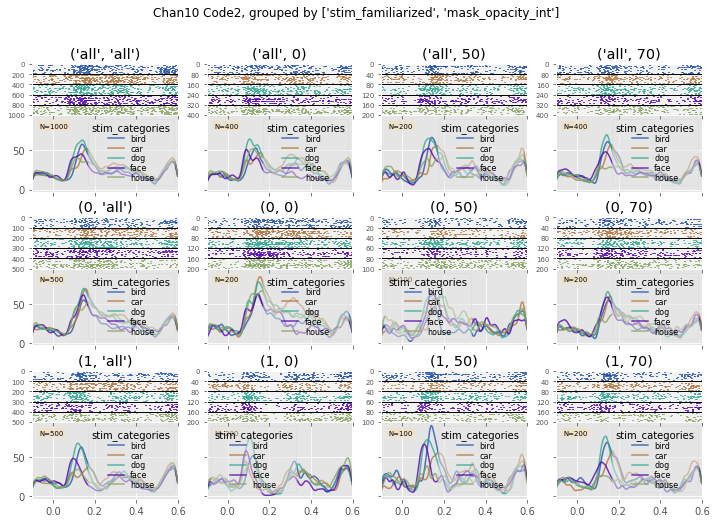

In [28]:
# group in subplots, and group in panel and use limit to select subset

pnp.PsthPlotMultiPanel(data_neuro_spk, index_signal=5, figsize=(12,8),
                       limit=data_neuro_spk['trial_info']['mask_opacity_int']<90,
                      groupby_subplots=['stim_familiarized', 'mask_opacity_int'], 
                      aggregate_subplots=True, 
                      groupby_panel='stim_categories', 
                      sk_std=0.010)